In [1]:
library("DESeq2")
library("geneplotter")
library("ggplot2")
library("vsn")
library("genefilter")
getwd()

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

[1] "/home/gstupp/projects/Wolan/wolan/Fusion_AW_20170831"

In [2]:
countData = read.csv("out/df.csv", row.names = 1)
meta_path = "metadata.csv"
sampleTable = read.csv(meta_path, row.names = 1)
sampleTable = sampleTable[colnames(countData),]
sampleTable$biological=factor(sampleTable$biological)
sampleTable$technical=factor(sampleTable$technical)
sampleTable$sample_type=factor(sampleTable$sample_type)
sampleTable$sample_type2=factor(sampleTable$sample_type2)
sampleTable$sample_type <- relevel(sampleTable$sample_type, ref="unenriched")
sampleTable$sample_type2 <- relevel(sampleTable$sample_type2, ref="unenriched")
sampleTable

,biological,technical,unenriched,probe,sample_type,sample_type2,sample_name,path
Neg1rep1,1,1,FALSE,FALSE,neg,probe,neg1,data/Neg1rep1/DTASelect-filter.txt
VK1rep1,1,1,FALSE,TRUE,probe,probe,vk1,data/VK1rep1/DTASelect-filter.txt
VK3rep1,1,1,FALSE,TRUE,probe,probe,vk3,data/VK3rep1/DTASelect-filter.txt
VK5rep1,1,1,FALSE,TRUE,probe,probe,vk5,data/VK5rep1/DTASelect-filter.txt
unenriched1,1,1,TRUE,FALSE,unenriched,unenriched,unenriched1,data/unenriched1/DTASelect-filter.txt
unenriched2,2,1,TRUE,FALSE,unenriched,unenriched,unenriched2,data/unenriched2/DTASelect-filter.txt
unenriched3,3,1,TRUE,FALSE,unenriched,unenriched,unenriched3,data/unenriched3/DTASelect-filter.txt


In [3]:
locusTable = read.csv("out/locus_df.csv", row.names = 1)
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ sample_type + biological)

In [4]:
vsd <- vst(dds)
rld <- rlog(dds)
head(assay(vsd), 3)

,Neg1rep1,VK1rep1,VK3rep1,VK5rep1,unenriched1,unenriched2,unenriched3
39522,5.696508,5.084145,5.199127,4.82463,4.824630,4.824630,4.824630
86769,4.824630,4.824630,5.469713,4.82463,5.598470,5.646425,5.609534
89985,4.824630,4.824630,4.824630,4.82463,5.215013,4.824630,4.824630


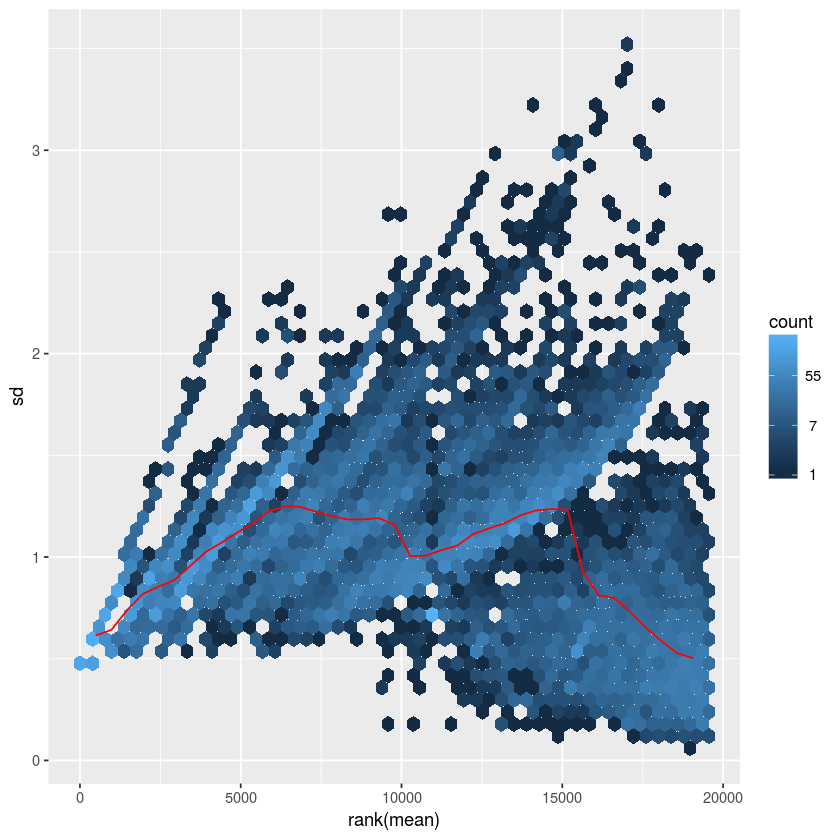

In [5]:
ntd <- normTransform(dds)
library("vsn")
meanSdPlot(assay(ntd))

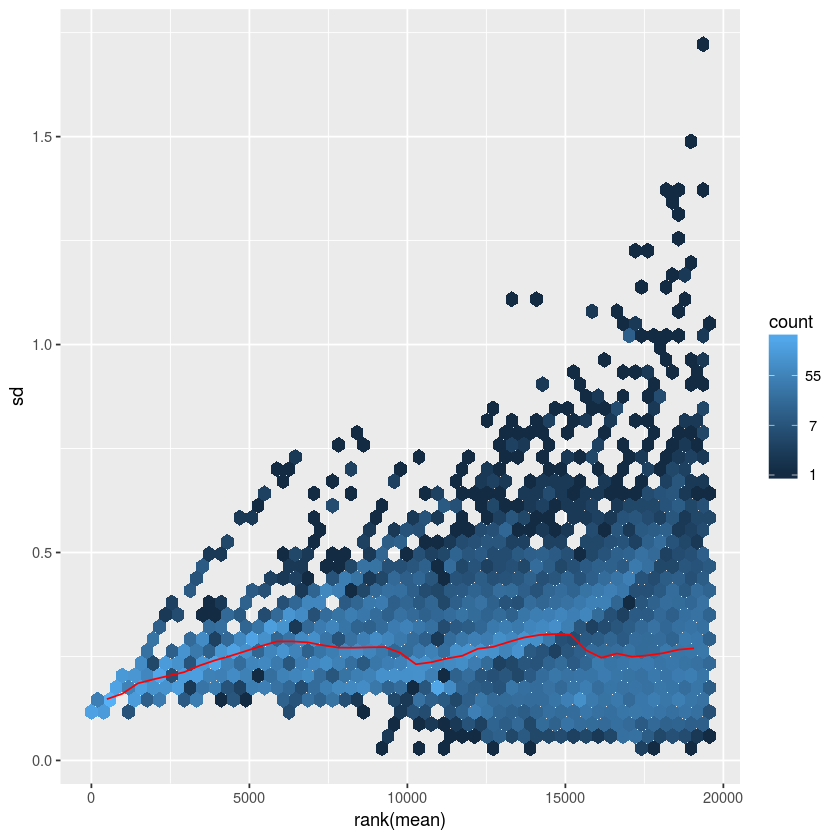

In [6]:
meanSdPlot(assay(vsd))

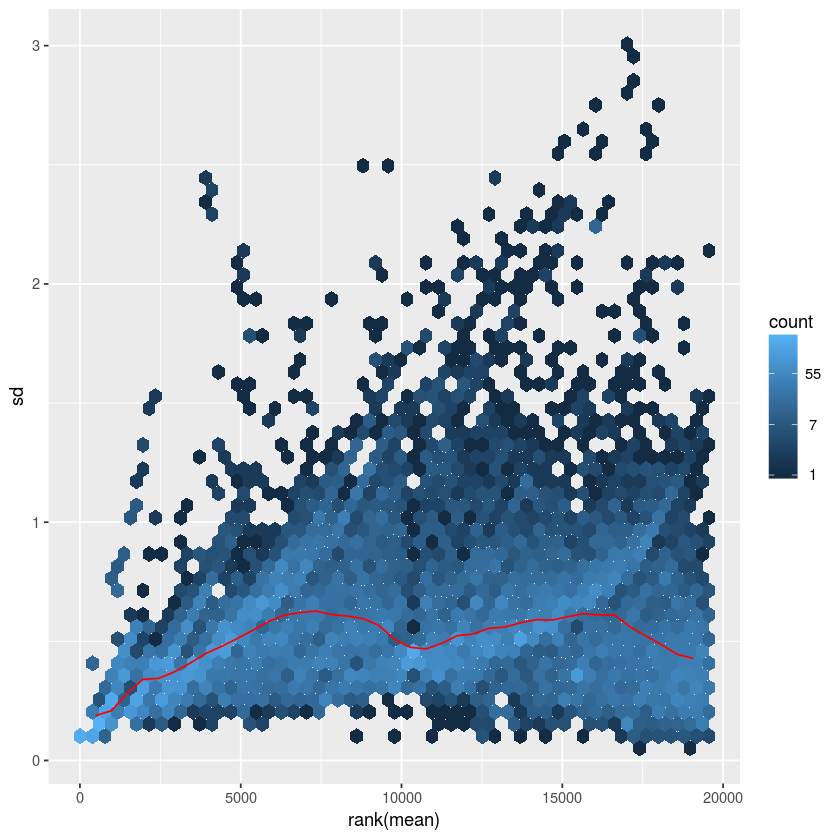

In [7]:
meanSdPlot(assay(rld))

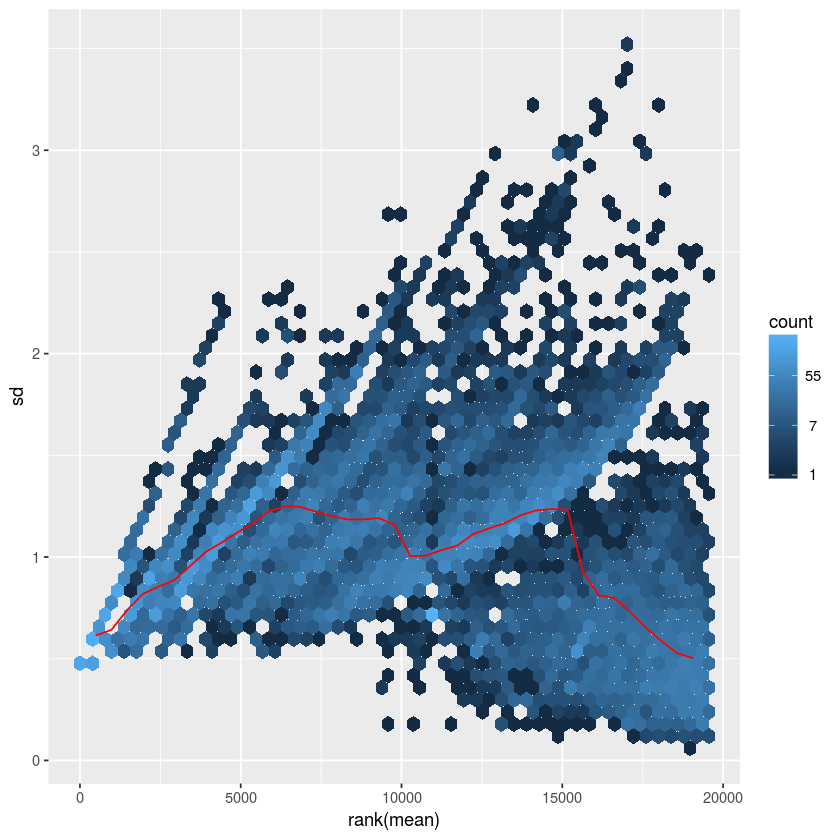

In [8]:
ntd <- normTransform(dds)
library("vsn")
meanSdPlot(assay(ntd))

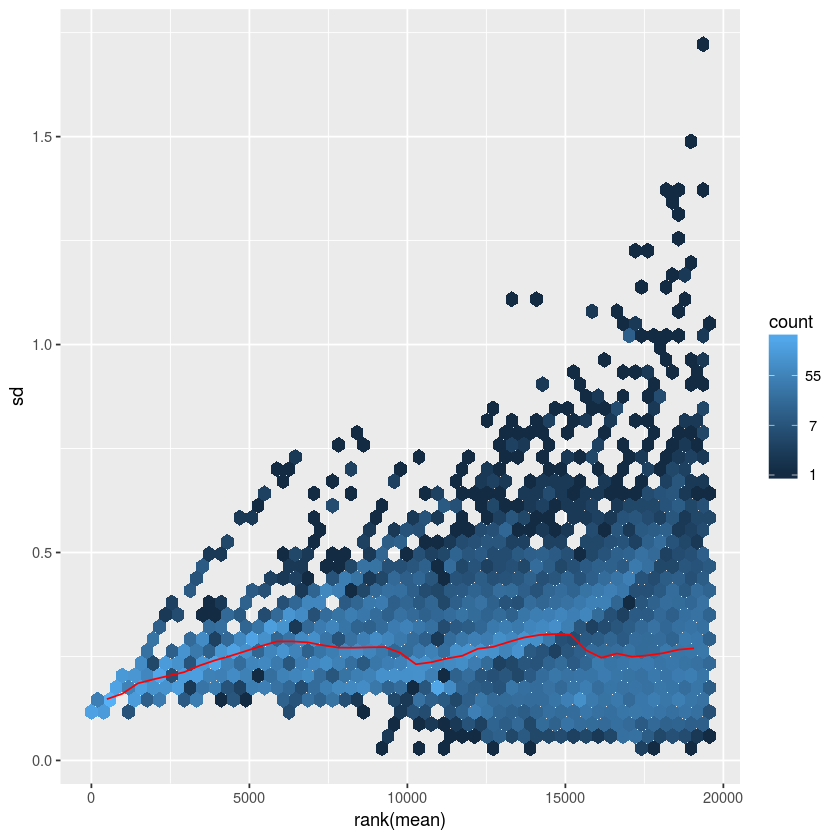

In [9]:
meanSdPlot(assay(vsd))

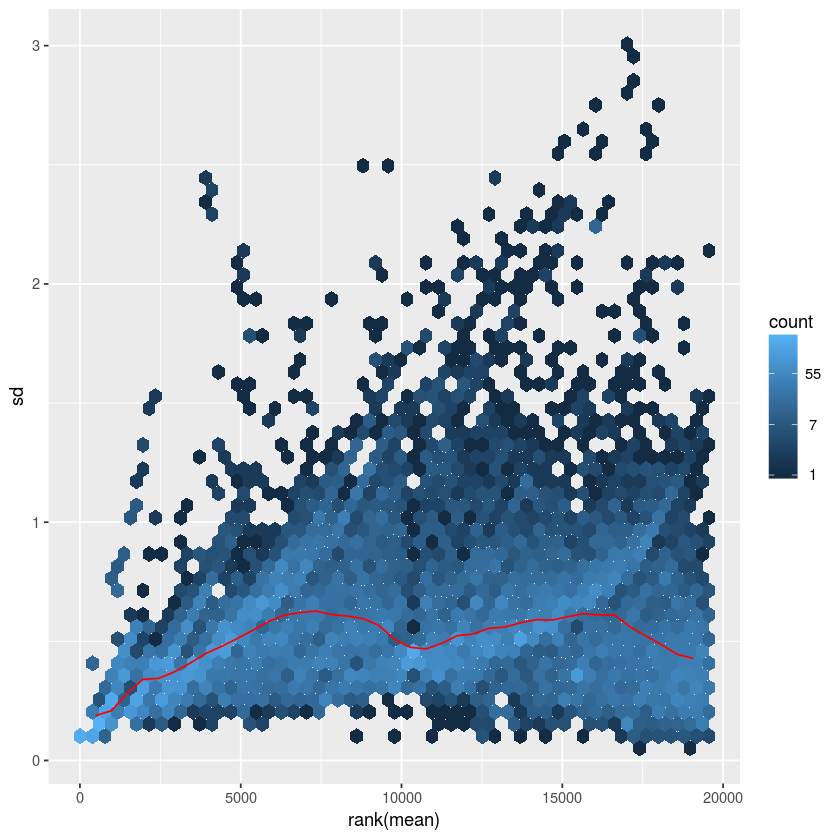

In [10]:
meanSdPlot(assay(rld))